# OLS REGRESSION CHALLENGE

# Introduction

In [1]:
# My name is Konstantinos Grousouzakos and I am aspiring to become a Data Analyst/Scientist.

# My educational background consists of a Bachelor's in Mechanical Engineering and a Master's in
# Industrial Engineering.

# My passion for statistics and data driven decision making has led me to choose the profession of 
# Data Analyst/Scientist as the one that fits best to my temperament, personality and natural skills.

# This is my first attempt at creating a predictive model using Machine Learning (Multilinear Regression).
# Thank you for taking the time to take a glance. 
# Any feedback is welcome.

# Date of Exercise Completion: 12th of December 2022
# Updated on 7th of February 2023
# In the next cell,there is a hyperlink to my LinkedIn profile.

www.linkedin.com/in/konstantinos-grousouzakos-data-analyst

# Description of the Exercise

In [2]:
# Multiple Linear Regression Challenge

# Background

# These data were aggregated from a number of sources including the American Community Survey (census.gov),
# clinicaltrials.gov, and cancer.gov. Most of the data preparation process can be viewed here.

# The goal is to build a Multivariate Ordinary Least Squares Regression model to predict "TARGET_deathRate"

# Deliverables
# a. The final model equation

# b. The statistical software output including (adjusted) R-squared and Root Mean Squared Error (RMSE)

# c. Other factors to consider:

# - Are there any outliers?
# - Are there missing values?
# - How the categorical variables must be handled?

# Data Dictionary
# TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

# avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

# avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

# incidenceRate: Mean per capita (100,000) cancer diagnoses(a)

# medianIncome: Median income per county (b)

# popEst2015: Population of county (b)

# povertyPercent: Percent of populace in poverty (b)

# studyPerCap: Per capita number of cancer-related clinical trials per county (a)

# binnedInc: Median income per capita binned by decile (b)

# MedianAge: Median age of county residents (b)

# MedianAgeMale: Median age of male county residents (b)

# MedianAgeFemale: Median age of female county residents (b)

# Geography: County name (b)

# AvgHouseholdSize: Mean household size of county (b)

# PercentMarried: Percent of county residents who are married (b)

# PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school
# (b)

# PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

# PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

# PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

# PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school 
# diploma (b)

# PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's 
# degree (b)

# PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

# PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

# PctPrivateCoverage: Percent of county residents with private health coverage (b)

# PctPrivateCoverageAlone: Percent of county residents with private health coverage alone 
# (no public assistance) (b)

# PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

# PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

# PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

# PctWhite: Percent of county residents who identify as White (b)

# PctBlack: Percent of county residents who identify as Black (b)

# PctAsian: Percent of county residents who identify as Asian (b)

# PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 
# (b)

# PctMarriedHouseholds: Percent of married households (b)

# BirthRate: Number of live births relative to number of women in county (b)

# (a): years 2010-2016

# (b): 2013 Census Estimates 

# In the next cell, there is a hyperlink to dataset.

https://data.world/nrippner/ols-regression-challenge

# Getting Familiar with the Dataset

In [3]:
# The first step is to get an idea of how the data are organized and determine what kind of data the 
# dataset contains (numerical, strings, etc.). I find MS Excel to be quite useful, since it displays 
# the entire dataset (if the dataset is somewhat large, Python displays only part of it) in a 
# tabular form that can be navigated in a "user friendly" way. After opening the cancer_reg.csv file,
# I adjust the width of the columns and proceed to make an initial "scan" of the dataset. 

In [4]:
# Most of the data are numeric (continuous or discreet variables) with the exception of the columns 
# "Geography" (the column contains string values) and "binnedInc" (the column contains numeric values 
# in the form of an interval).

# In addition, missing values can be spotted.
# It is obvious that the dataset needs to "cleaned" and preprocessed before it is used for model
# building. The next step is to jump into Python and start the "cleaning/preprocessing" stage. 

# Libraries and data

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("cancer_reg.csv", encoding='latin-1')
cancer_df = data.copy()
cancer_df.head(2)
# Without the encoding paremeter, this error presents itself:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 41137: invalid continuation byte

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096


# Exploratory Data Analysis

In [7]:
cancer_df.describe()
# At first glance, we can see that some of the variables (columns) definitely contain outliers 
# (The maximum value observed is way greater than the 75% percentile. The standard deviation is 2 or 
# 3 times higher compared to the mean, which indicates that the data of this variable are very spread 
# out).

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [8]:
cancer_df.isnull().sum() 
# It is probably best for missing values to be dropped. 

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [9]:
cancer_df.dtypes
# All the variables are numeric (integers or floats) except from the columns with the labels 
# "Geography" and "binnedInc". The data type they hold is defined as "object" data type.

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

# Data Cleaning and Preprocessing

# PART 1 : CATEGORICAL VARIABLES

In [10]:
print(type(cancer_df['binnedInc'][0]))
print(type(cancer_df['Geography'][0]))
# The "Geography" column can be characterized as a categorical value and indeed contains pieces of 
# information stored as text (strings). However, the "binnedInc" column contains numeric data in 
# the form of intervals, presented as strings.

<class 'str'>
<class 'str'>


In [11]:
cancer_df['Geography'][0] # Displaying how the "Geography" column holds the data

'Kitsap County, Washington'

In [12]:
cancer_df['binnedInc'][0] # Displaying how the "binnedInc" column holds the data

'(61494.5, 125635]'

In [13]:
cancer_df['binnedInc'].describe() # Ten different unique kinds of variables.

count                   3047
unique                    10
top       (54545.6, 61494.5]
freq                     306
Name: binnedInc, dtype: object

In [14]:
# TRANSFORMING THE 'binnedInc' VARIABLE. 

# We are going to reduce the number of unique entries in the variable in order to minimize the 
# number of dummy variables that are to be used in the model. We can do that by "regrouping" the 
# unique entries. For example, the first two bins we be grouped as the first bin, the third and fourth 
# will be grouped the second bin e.t.c.

In [15]:
cancer_df['binnedInc'].unique() # Displaying the unique entries in the "binnedInc" variable

array(['(61494.5, 125635]', '(48021.6, 51046.4]', '(42724.4, 45201]',
       '(51046.4, 54545.6]', '(37413.8, 40362.7]', '(40362.7, 42724.4]',
       '(54545.6, 61494.5]', '(34218.1, 37413.8]', '[22640, 34218.1]',
       '(45201, 48021.6]'], dtype=object)

In [16]:
# Regrouping the bins
bin_1 = np.array(['[22640, 34218.1]','(34218.1, 37413.8]'])

bin_2 = np.array(['(37413.8, 40362.7]','(40362.7, 42724.4]'])

bin_3 = np.array(['(42724.4, 45201]','(45201, 48021.6]'])

bin_4 = np.array(['(48021.6, 51046.4]','(51046.4, 54545.6]'])

bin_5 = np.array(['(54545.6, 61494.5]','(61494.5, 125635]'])


In [17]:
# Assigning new entries according to the new groups
cancer_df['binnedInc'] = np.where(np.isin(cancer_df['binnedInc'], bin_1), 'BIN_1',
                                  cancer_df['binnedInc'])

cancer_df['binnedInc'] = np.where(np.isin(cancer_df['binnedInc'], bin_2), 'BIN_2',
                                  cancer_df['binnedInc'])

cancer_df['binnedInc'] = np.where(np.isin(cancer_df['binnedInc'], bin_3), 'BIN_3',
                                  cancer_df['binnedInc'])

cancer_df['binnedInc'] = np.where(np.isin(cancer_df['binnedInc'], bin_4), 'BIN_4',
                                  cancer_df['binnedInc'])

cancer_df['binnedInc'] = np.where(np.isin(cancer_df['binnedInc'], bin_5), 'BIN_5',
                                  cancer_df['binnedInc'])

In [18]:
cancer_df['binnedInc'].describe()  # Five unique entries

count      3047
unique        5
top       BIN_3
freq        611
Name: binnedInc, dtype: object

In [19]:
cancer_df['binnedInc'].unique() # Names of unique entries

array(['BIN_5', 'BIN_4', 'BIN_3', 'BIN_2', 'BIN_1'], dtype=object)

In [20]:
# TRANSFORMING THE 'Geography' VARIABLE.

# Every entry of the Series is unique, because every county in a specific state is unique. 
# We could break it down to states instead of counties. Furthermore, we will group the states to
# west/center/east in order to minimize the number of dummy variables that are to be used in the model.
# From 50 dummy 'state' variables to 2 'location' variables.

In [21]:
cancer_df[['Geography']].describe() # 3047 unique entries

,Geography
count,3047
unique,3047
top,"Kitsap County, Washington"
freq,1


In [22]:
Geo_cat_var = cancer_df["Geography"].copy() # Copying the data from the "Geography" column to a variable
Geo_cat_var

0          Kitsap County, Washington
1        Kittitas County, Washington
2       Klickitat County, Washington
3           Lewis County, Washington
4         Lincoln County, Washington
                    ...             
3042        Ellsworth County, Kansas
3043           Finney County, Kansas
3044             Ford County, Kansas
3045         Franklin County, Kansas
3046            Geary County, Kansas
Name: Geography, Length: 3047, dtype: object

In [23]:
for i in range(0, len(Geo_cat_var)):
    Geo_cat_var[i] = Geo_cat_var[i].split(', ')[1]
Geo_cat_var 
# Splitting each element of the series and keeping only the information regarding state.

0       Washington
1       Washington
2       Washington
3       Washington
4       Washington
           ...    
3042        Kansas
3043        Kansas
3044        Kansas
3045        Kansas
3046        Kansas
Name: Geography, Length: 3047, dtype: object

In [24]:
cancer_df["Geography"] = Geo_cat_var
cancer_df["Geography"] 
# Substituting the data from the variable to the dataframe's column

0       Washington
1       Washington
2       Washington
3       Washington
4       Washington
           ...    
3042        Kansas
3043        Kansas
3044        Kansas
3045        Kansas
3046        Kansas
Name: Geography, Length: 3047, dtype: object

In [25]:
cancer_df[['Geography']].describe() # 51 unique entries

,Geography
count,3047
unique,51
top,Texas
freq,233


In [26]:
# Grouping the states
west_states = np.array(['Washington', 'Oregon', 'California', 'Nevada', 'Idaho', 'Montana',
                        'Wyoming', 'Utah', 'Arizona', 'New Mexico', 'Colorado', 'Alaska', 'Hawaii'])

center_states = np.array(['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Texas',
                        'Louisiana', 'Arkansas', 'Missouri', 'Iowa', 'Minnesota', 'Wisconsin',
                          'Illinois', 'Indiana', 'Michigan'])

east_states = np.array(['Florida', 'Georgia', 'Alabama', 'Mississippi', 'Tennessee', 'Kentucky',
                        'South Carolina', 'North Carolina', 'Virginia', 'West Virginia', 'Ohio', 
                        'Pennsylvania', 'New York', 'Massachusetts', 'Vermont', 'New Hampshire',
                       'Maine', 'Connecticut', 'New Jersey', 'Delaware', 'Maryland', 'Rhode Island',
                       'District of Columbia'])

print(len(west_states) + len(center_states)+len(east_states))

51


In [27]:
# Assigning new entries according to the new groups
cancer_df['Geography'] = np.where(np.isin(cancer_df['Geography'], west_states), 'WEST',
                                  cancer_df['Geography'])

cancer_df['Geography'] = np.where(np.isin(cancer_df['Geography'], center_states), 'CENTER',
                                  cancer_df['Geography'])

cancer_df['Geography'] = np.where(np.isin(cancer_df['Geography'], east_states), 'EAST',
                                  cancer_df['Geography'])


In [28]:
cancer_df[['Geography']].describe() # 3 unique entries

,Geography
count,3047
unique,3
top,CENTER
freq,1391


In [29]:
cancer_df.Geography.unique()

array(['WEST', 'EAST', 'CENTER'], dtype=object)

# PART 2 : DELETING NAN DATA

In [30]:
cancer_df.shape # Before deleting columns

(3047, 34)

In [31]:
# Deleting the variables that contain missing data from the numeric dataset
# There are too many missing data in the columns "PctSomeCol18_24" and "PctPrivateCoverageAlone". 
# It is wise to delete the entire column
del cancer_df["PctSomeCol18_24"]
del cancer_df["PctPrivateCoverageAlone"]
cancer_df.shape

(3047, 32)

In [32]:
# For the variable "PctEmployed16_Over", we will just drop the NAN rows 
cancer_df.dropna(inplace = True)
cancer_df.shape # After deleting rows

(2895, 32)

# PART 3 : TRIMMING THE DATASET

In [33]:
# Visualizing the data is always a great way to get a first glance at how they are distributed. 
# If we get a "visual cue", we are going to explore more in depth the distribution by accessing a 
# specific range of percentiles. Based on the distribution, meaning that if any extreme values present 
# themselves, we will "shorten" the dataset.

# We execute the following lines of code  to create histograms and reveal the percentiles. 
# Wherever it is necessary, we delete the rows that contain outliers.

array([[<AxesSubplot:title={'center':'avgAnnCount'}>,
        <AxesSubplot:title={'center':'avgDeathsPerYear'}>,
        <AxesSubplot:title={'center':'TARGET_deathRate'}>,
        <AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>],
       [<AxesSubplot:title={'center':'popEst2015'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>,
        <AxesSubplot:title={'center':'studyPerCap'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>],
       [<AxesSubplot:title={'center':'MedianAgeFemale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>,
        <AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>],
       [<AxesSubplot:title={'center':'PctBachDeg18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25

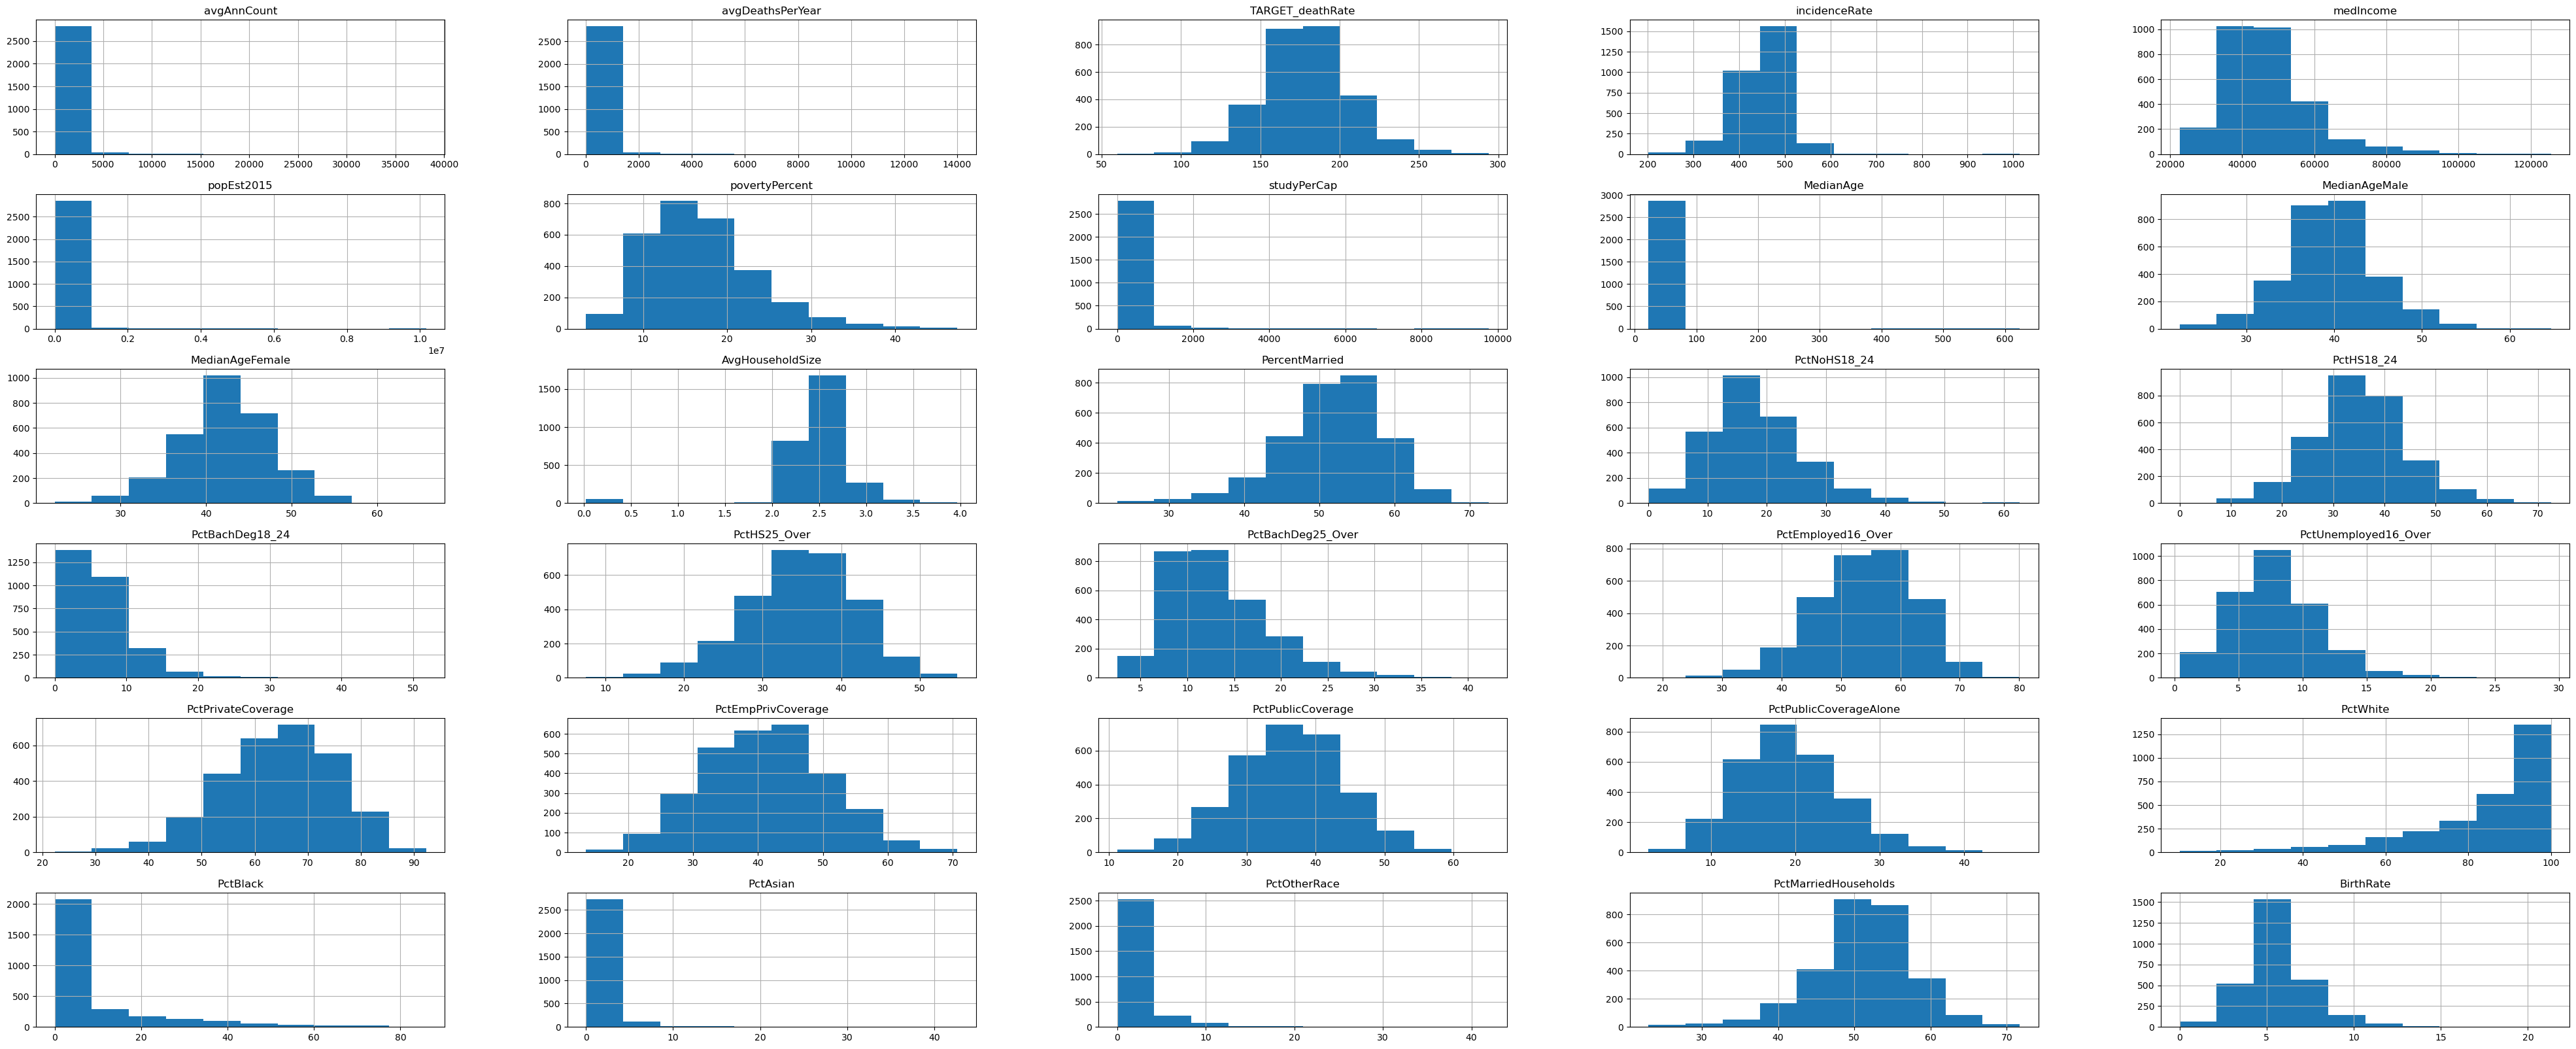

In [34]:
cancer_df.hist(figsize = (50,20),xlabelsize = 10 ,ylabelsize = 10)

In [35]:
# At first glance, most of the variables seem to be distributed in a "normal-way" or follow a specific 
# pattern. Some variables seem to require further investigation are:

In [36]:
# Writing a function that diplays histogram of the variable
def display_variable_hist(Variable):
    cancer_df[Variable].hist(figsize = (10,5),
                                       xlabelsize = 15,
                                      ylabelsize = 15, legend = True)

In [37]:
# Writing a function that diplays the percentiles of the variable
def display_variable_percentiles(Variable):
    for i in range(0,105,5):
        print( np.percentile(cancer_df[Variable], i).round(2), "Percentile: ", i)

In [38]:
# Writing a function that shortens the dataframe
def df_shorten(Variable, v_short):
    global cancer_df
    print(len(cancer_df)) # Displaying the number of rows before "shortening"
    cancer_df = cancer_df[cancer_df[Variable]< v_short]
    print(len(cancer_df)) # Displaying the number of rows after "shortening"

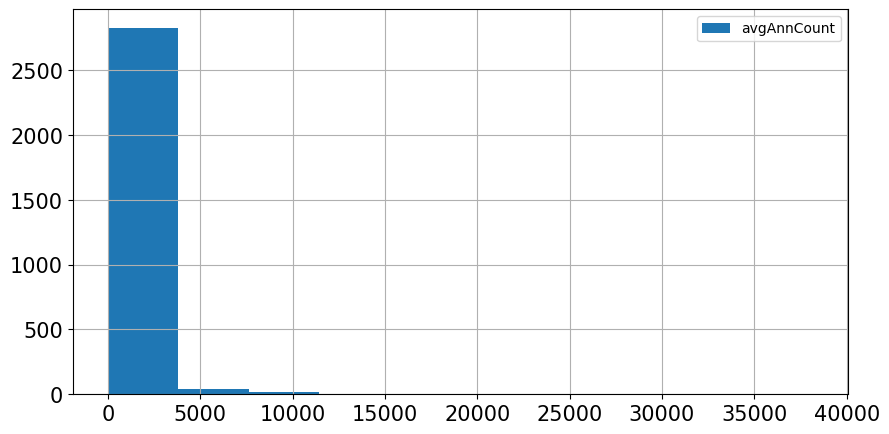

In [39]:
# Histogram before "shortening"
display_variable_hist('avgAnnCount')

In [40]:
# Percentiles
display_variable_percentiles('avgAnnCount')

6.0 Percentile:  0
22.7 Percentile:  5
37.0 Percentile:  10
49.0 Percentile:  15
61.0 Percentile:  20
75.5 Percentile:  25
92.0 Percentile:  30
106.9 Percentile:  35
123.0 Percentile:  40
145.0 Percentile:  45
171.0 Percentile:  50
203.0 Percentile:  55
240.4 Percentile:  60
297.0 Percentile:  65
393.8 Percentile:  70
515.0 Percentile:  75
743.4 Percentile:  80
1194.5 Percentile:  85
1962.67 Percentile:  90
2015.6 Percentile:  95
38150.0 Percentile:  100


In [41]:
# Shortening the dataframe
df_shorten('avgAnnCount',15000)

2895
2892


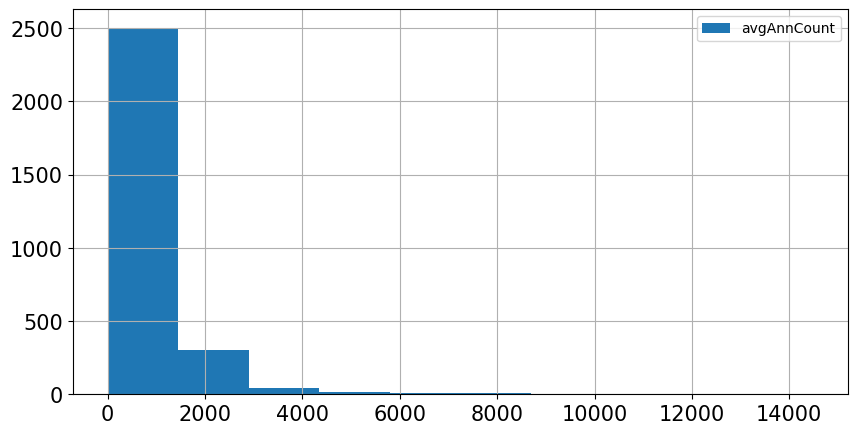

In [42]:
# Histogram after "shortening"
display_variable_hist('avgAnnCount')

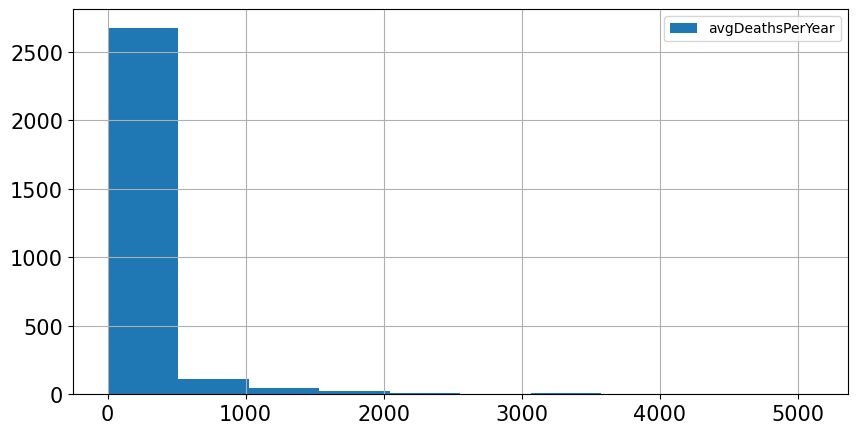

In [43]:
# Histogram before "shortening"
display_variable_hist('avgDeathsPerYear')

In [44]:
# Percentiles
display_variable_percentiles('avgDeathsPerYear')

3.0 Percentile:  0
9.0 Percentile:  5
14.0 Percentile:  10
18.0 Percentile:  15
23.0 Percentile:  20
28.0 Percentile:  25
33.0 Percentile:  30
40.0 Percentile:  35
47.0 Percentile:  40
53.0 Percentile:  45
61.0 Percentile:  50
70.0 Percentile:  55
83.0 Percentile:  60
98.0 Percentile:  65
117.0 Percentile:  70
147.0 Percentile:  75
185.0 Percentile:  80
244.05 Percentile:  85
376.8 Percentile:  90
755.7 Percentile:  95
5108.0 Percentile:  100


In [45]:
# Shortening the dataframe
df_shorten('avgDeathsPerYear',4000)

2892
2888


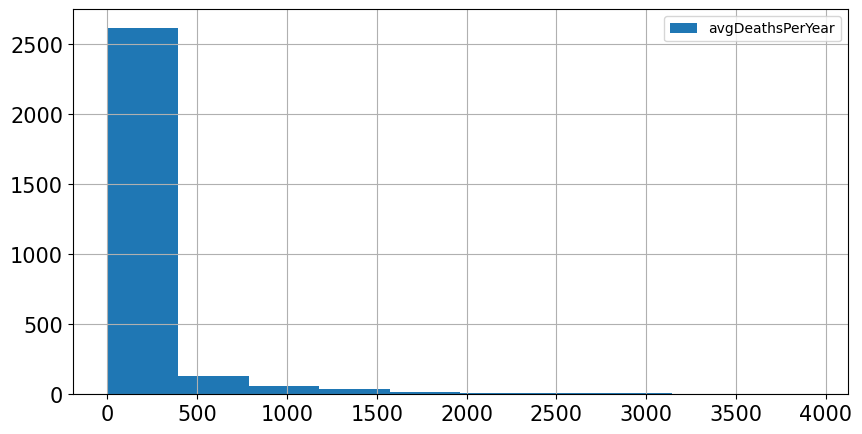

In [46]:
# Histogram after "shortening"
display_variable_hist('avgDeathsPerYear')

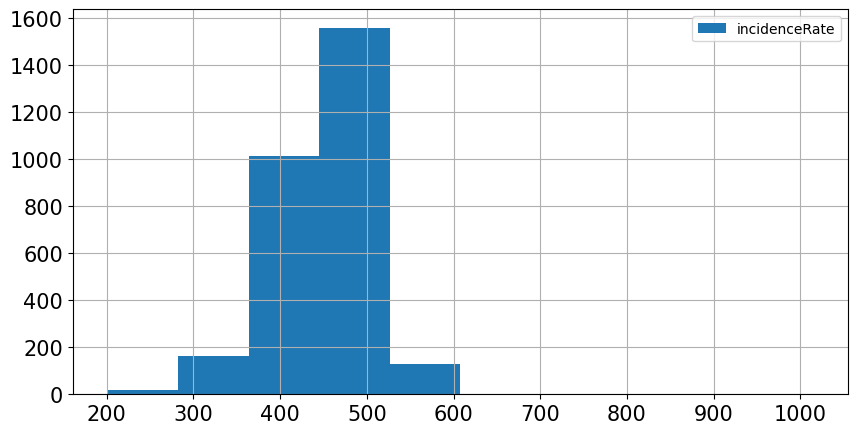

In [47]:
# Histogram before "shortening"
display_variable_hist('incidenceRate')

In [48]:
# Percentiles
display_variable_percentiles('incidenceRate')

201.3 Percentile:  0
355.24 Percentile:  5
381.0 Percentile:  10
399.0 Percentile:  15
410.18 Percentile:  20
420.38 Percentile:  25
428.1 Percentile:  30
435.24 Percentile:  35
443.28 Percentile:  40
450.32 Percentile:  45
453.55 Percentile:  50
455.38 Percentile:  55
460.9 Percentile:  60
467.4 Percentile:  65
473.5 Percentile:  70
480.72 Percentile:  75
488.0 Percentile:  80
495.28 Percentile:  85
507.33 Percentile:  90
524.86 Percentile:  95
1014.2 Percentile:  100


In [49]:
# Shortening the dataframe
df_shorten('incidenceRate', 650)

2888
2885


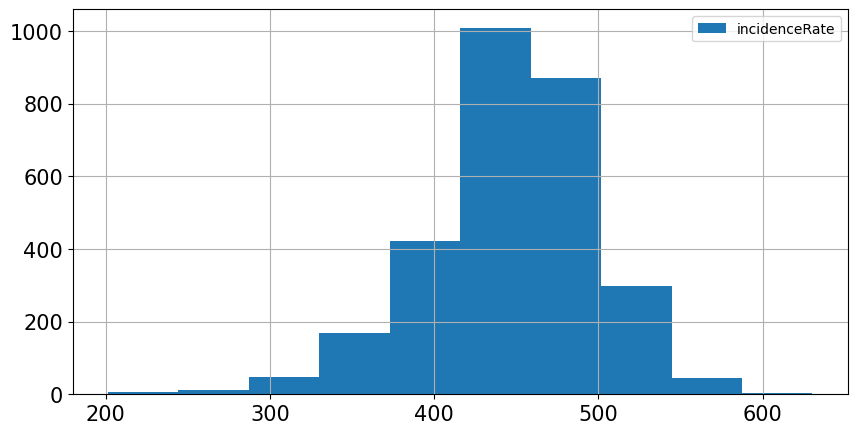

In [50]:
# Histogram after "shortening"
display_variable_hist('incidenceRate')

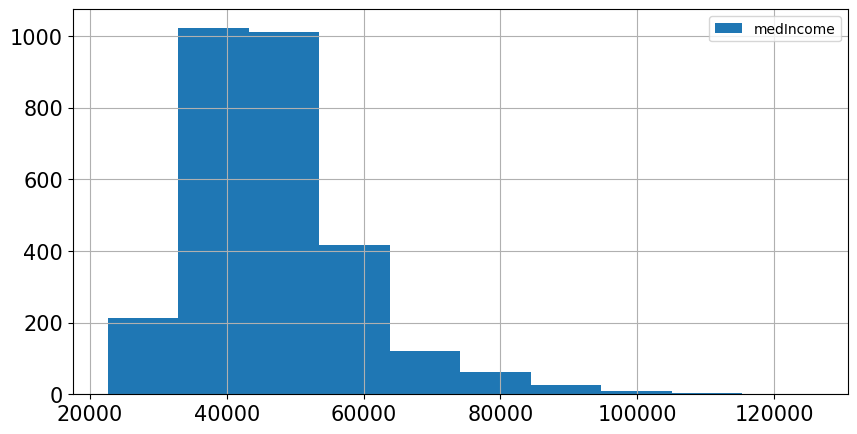

In [51]:
# Histogram before "shortening"
display_variable_hist('medIncome')

In [52]:
# Percentiles
display_variable_percentiles('medIncome')

22640.0 Percentile:  0
31821.8 Percentile:  5
34116.0 Percentile:  10
35890.6 Percentile:  15
37315.0 Percentile:  20
38742.0 Percentile:  25
40258.4 Percentile:  30
41397.4 Percentile:  35
42616.4 Percentile:  40
43783.0 Percentile:  45
45082.0 Percentile:  50
46505.0 Percentile:  55
47993.0 Percentile:  60
49566.2 Percentile:  65
51031.2 Percentile:  70
52444.0 Percentile:  75
54468.8 Percentile:  80
57209.2 Percentile:  85
61179.8 Percentile:  90
69431.6 Percentile:  95
125635.0 Percentile:  100


In [53]:
# Shortening the dataframe
df_shorten('medIncome', 118000)

2885
2883


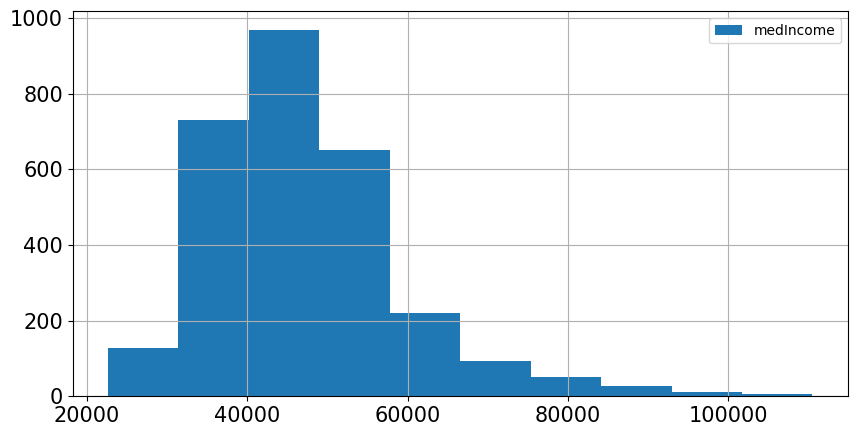

In [54]:
# Histogram after "shortening"
display_variable_hist('medIncome')

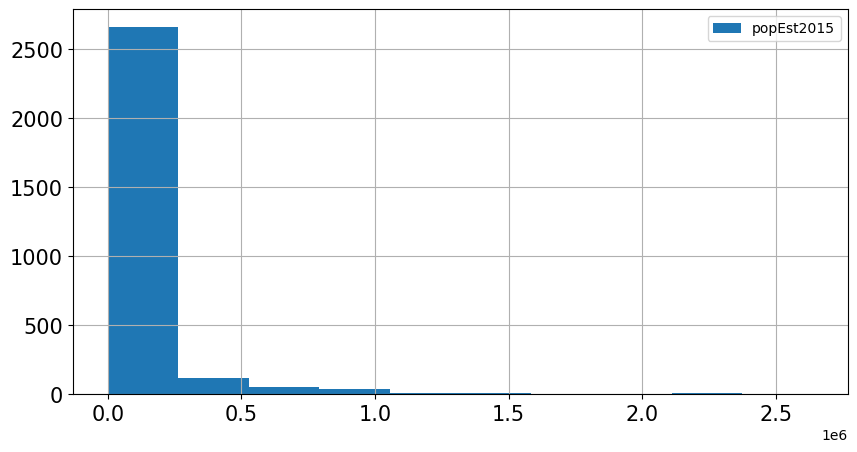

In [55]:
# Histogram before "shortening"
display_variable_hist('popEst2015')

In [56]:
# Percentiles
display_variable_percentiles('popEst2015')

827.0 Percentile:  0
3654.2 Percentile:  5
5776.0 Percentile:  10
7656.9 Percentile:  15
9496.4 Percentile:  20
11564.0 Percentile:  25
14035.6 Percentile:  30
16447.4 Percentile:  35
19342.4 Percentile:  40
22628.0 Percentile:  45
26395.0 Percentile:  50
31476.3 Percentile:  55
37151.6 Percentile:  60
43769.3 Percentile:  65
52971.6 Percentile:  70
67411.5 Percentile:  75
91560.0 Percentile:  80
133006.9 Percentile:  85
202623.4 Percentile:  90
433877.1 Percentile:  95
2636735.0 Percentile:  100


In [57]:
# Shortening the dataframe
df_shorten('popEst2015',420000 )

2883
2736


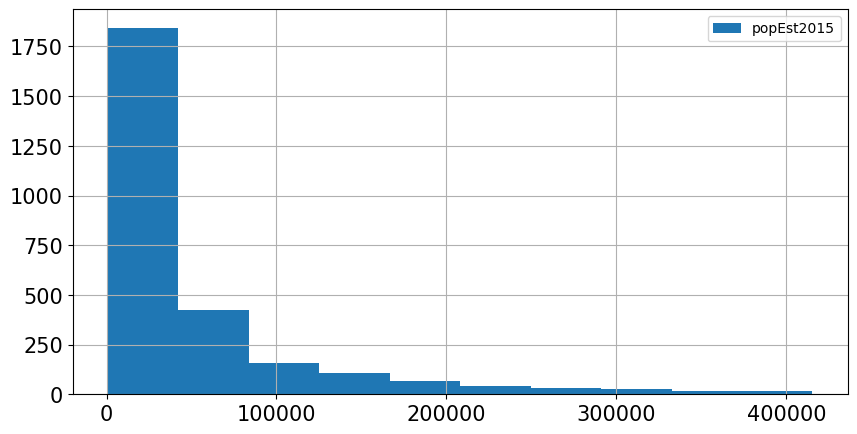

In [58]:
# Histogram after "shortening"
display_variable_hist('popEst2015')

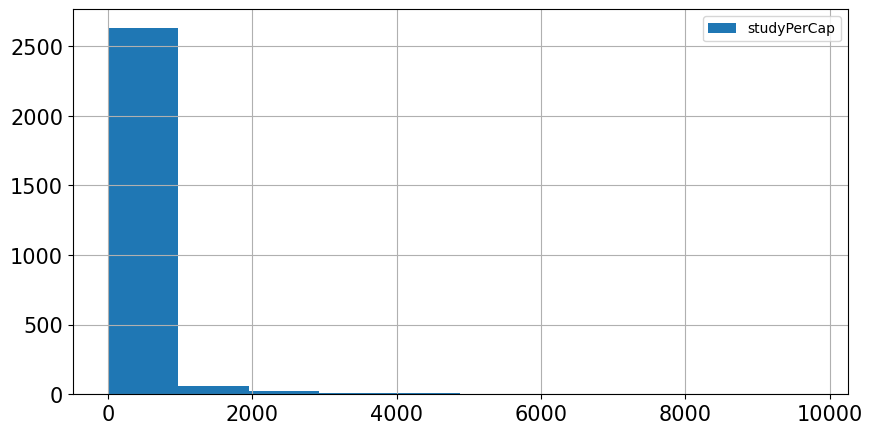

In [59]:
# Histogram before "shortening"
display_variable_hist('studyPerCap')

In [60]:
# Percentiles
display_variable_percentiles('studyPerCap')

0.0 Percentile:  0
0.0 Percentile:  5
0.0 Percentile:  10
0.0 Percentile:  15
0.0 Percentile:  20
0.0 Percentile:  25
0.0 Percentile:  30
0.0 Percentile:  35
0.0 Percentile:  40
0.0 Percentile:  45
0.0 Percentile:  50
0.0 Percentile:  55
0.0 Percentile:  60
0.0 Percentile:  65
22.22 Percentile:  70
51.16 Percentile:  75
105.57 Percentile:  80
191.45 Percentile:  85
368.47 Percentile:  90
728.92 Percentile:  95
9762.31 Percentile:  100


In [61]:
# Shortening the dataframe
df_shorten('studyPerCap', 5000 )

2736
2732


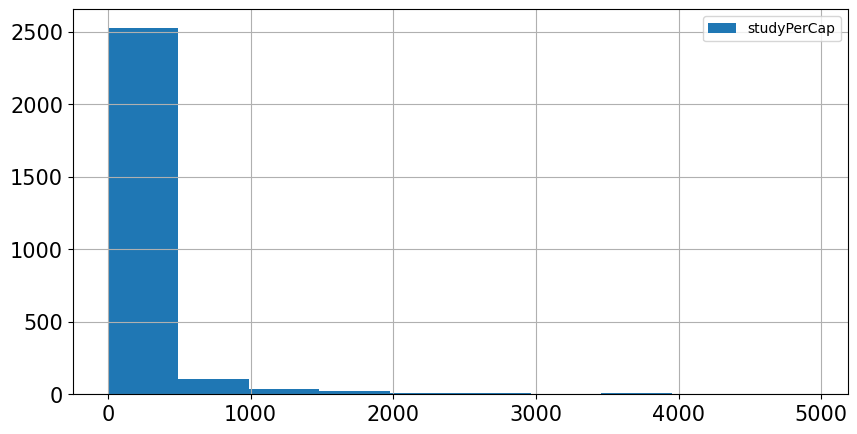

In [62]:
# Histogram after "shortening"
display_variable_hist('studyPerCap')

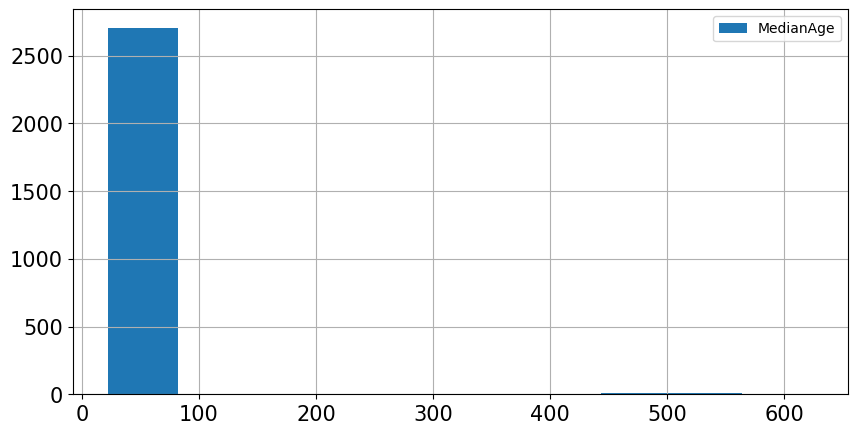

In [63]:
# Histogram before "shortening"
display_variable_hist('MedianAge')

In [64]:
# Percentiles
display_variable_percentiles('MedianAge')

22.3 Percentile:  0
32.1 Percentile:  5
34.7 Percentile:  10
36.0 Percentile:  15
37.1 Percentile:  20
38.1 Percentile:  25
38.8 Percentile:  30
39.5 Percentile:  35
40.1 Percentile:  40
40.7 Percentile:  45
41.2 Percentile:  50
41.7 Percentile:  55
42.3 Percentile:  60
42.8 Percentile:  65
43.5 Percentile:  70
44.2 Percentile:  75
45.1 Percentile:  80
46.3 Percentile:  85
47.9 Percentile:  90
50.4 Percentile:  95
624.0 Percentile:  100


In [65]:
# Shortening the dataframe
df_shorten('MedianAge', 100) # KIND OF RARE FOR SOMEONE TO BE MORE 600 YR OLD!!!

2732
2706


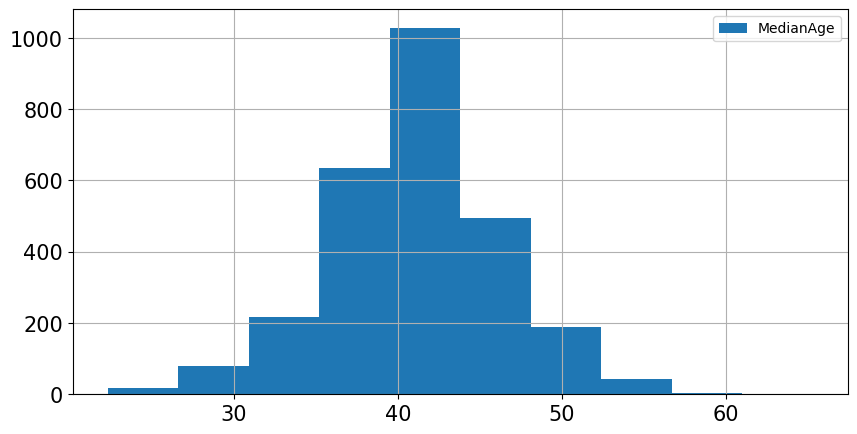

In [66]:
# Histogram after "shortening"
display_variable_hist('MedianAge')

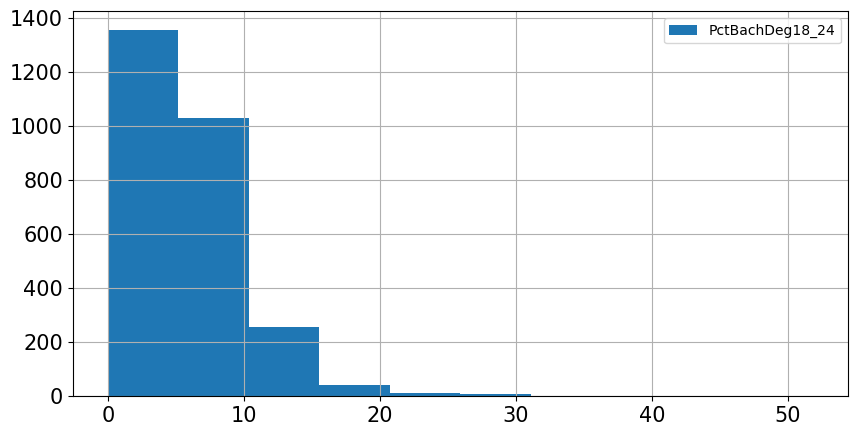

In [67]:
# Histogram before "shortening"
display_variable_hist('PctBachDeg18_24')

In [68]:
# Percentiles
display_variable_percentiles('PctBachDeg18_24')

0.0 Percentile:  0
0.5 Percentile:  5
1.3 Percentile:  10
2.0 Percentile:  15
2.5 Percentile:  20
2.92 Percentile:  25
3.4 Percentile:  30
3.8 Percentile:  35
4.3 Percentile:  40
4.8 Percentile:  45
5.1 Percentile:  50
5.6 Percentile:  55
6.1 Percentile:  60
6.5 Percentile:  65
7.1 Percentile:  70
7.8 Percentile:  75
8.6 Percentile:  80
9.5 Percentile:  85
10.9 Percentile:  90
13.28 Percentile:  95
51.8 Percentile:  100


In [69]:
# Shortening the dataframe
df_shorten('PctBachDeg18_24', 40 ) 

2706
2703


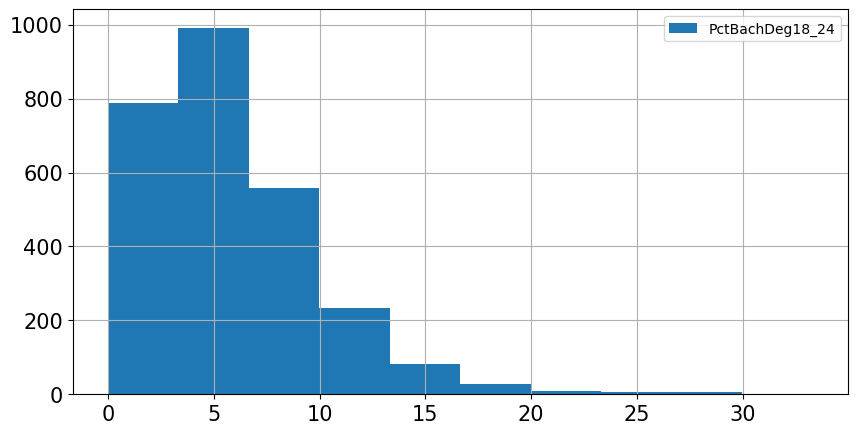

In [70]:
# Histogram after "shortening"
display_variable_hist('PctBachDeg18_24')

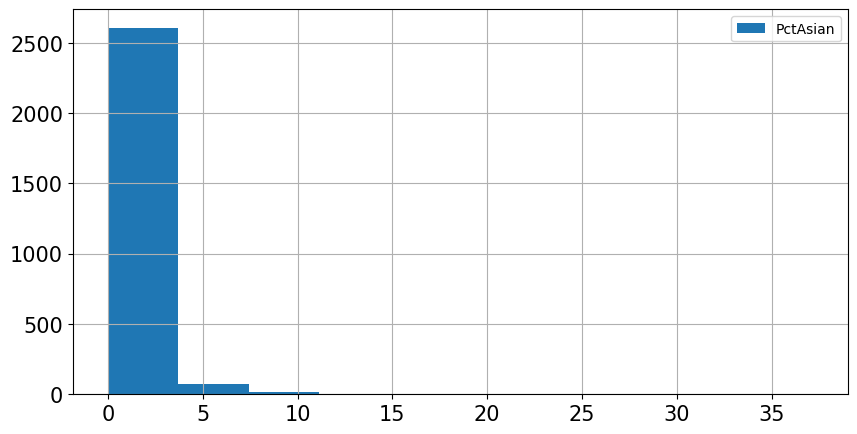

In [71]:
# Histogram before "shortening"
display_variable_hist('PctAsian')

In [72]:
# Percentiles
display_variable_percentiles('PctAsian')

0.0 Percentile:  0
0.0 Percentile:  5
0.05 Percentile:  10
0.11 Percentile:  15
0.17 Percentile:  20
0.23 Percentile:  25
0.29 Percentile:  30
0.34 Percentile:  35
0.4 Percentile:  40
0.45 Percentile:  45
0.51 Percentile:  50
0.58 Percentile:  55
0.64 Percentile:  60
0.75 Percentile:  65
0.87 Percentile:  70
1.05 Percentile:  75
1.24 Percentile:  80
1.55 Percentile:  85
2.09 Percentile:  90
3.15 Percentile:  95
37.16 Percentile:  100


In [73]:
# Shortening the dataframe
df_shorten('PctAsian', 10 ) 

2703
2693


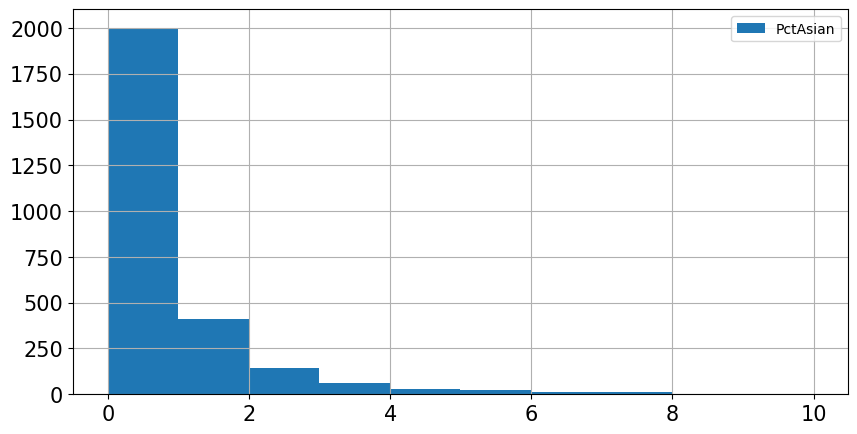

In [74]:
# Histogram after "shortening"
display_variable_hist('PctAsian')

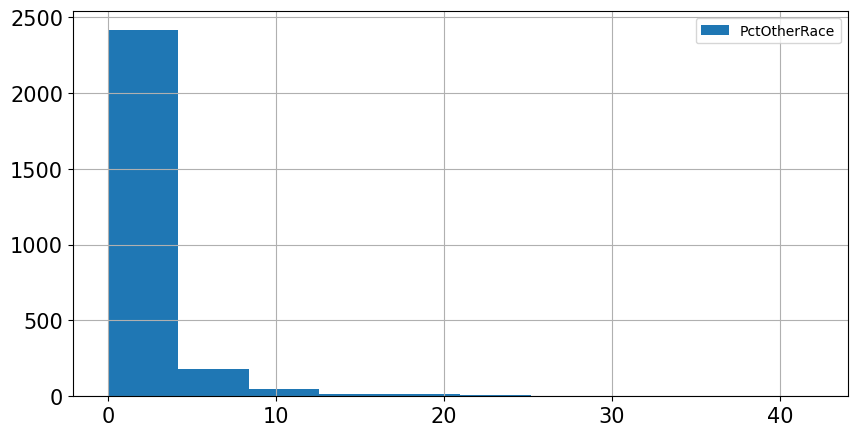

In [75]:
# Histogram before "shortening"
display_variable_hist('PctOtherRace')

In [76]:
# Percentiles
display_variable_percentiles('PctOtherRace')

0.0 Percentile:  0
0.01 Percentile:  5
0.08 Percentile:  10
0.14 Percentile:  15
0.21 Percentile:  20
0.27 Percentile:  25
0.35 Percentile:  30
0.43 Percentile:  35
0.53 Percentile:  40
0.63 Percentile:  45
0.75 Percentile:  50
0.91 Percentile:  55
1.05 Percentile:  60
1.26 Percentile:  65
1.56 Percentile:  70
1.9 Percentile:  75
2.42 Percentile:  80
3.09 Percentile:  85
4.25 Percentile:  90
6.91 Percentile:  95
41.93 Percentile:  100


In [77]:
# Shortening the dataframe
df_shorten('PctOtherRace', 25 ) 

2693
2682


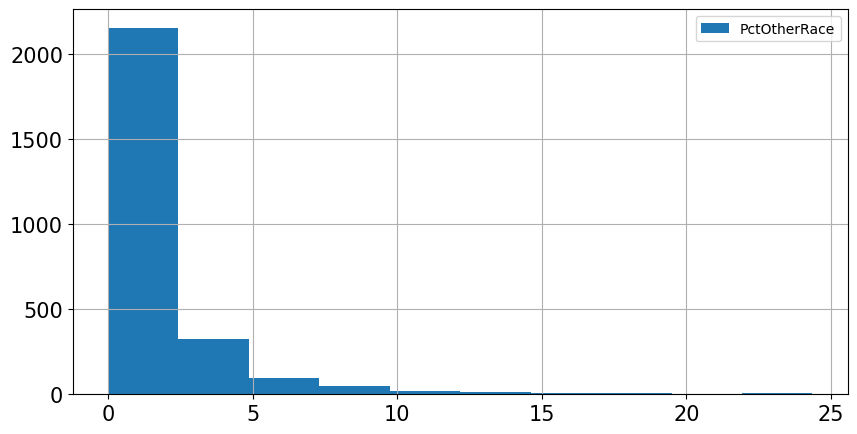

In [78]:
# Histogram after "shortening"
display_variable_hist('PctOtherRace')

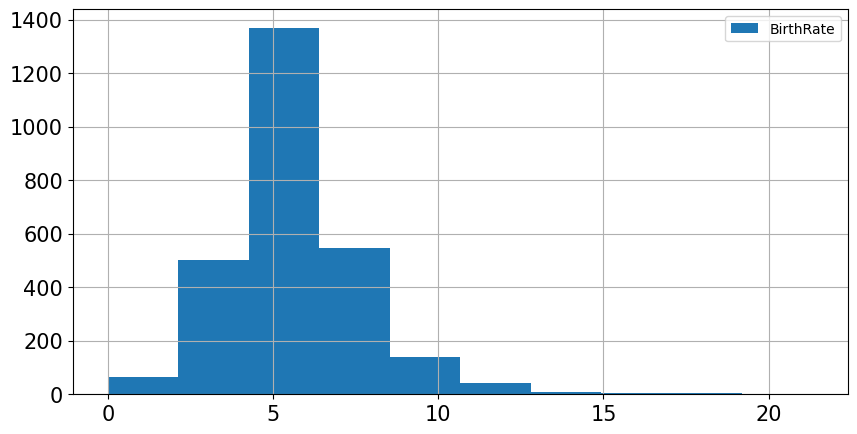

In [79]:
# Histogram before "shortening"
display_variable_hist('BirthRate')

In [80]:
# Percentiles
display_variable_percentiles('BirthRate')

0.0 Percentile:  0
2.83 Percentile:  5
3.51 Percentile:  10
3.9 Percentile:  15
4.2 Percentile:  20
4.48 Percentile:  25
4.69 Percentile:  30
4.88 Percentile:  35
5.03 Percentile:  40
5.22 Percentile:  45
5.41 Percentile:  50
5.64 Percentile:  55
5.81 Percentile:  60
6.04 Percentile:  65
6.29 Percentile:  70
6.59 Percentile:  75
6.92 Percentile:  80
7.31 Percentile:  85
8.04 Percentile:  90
9.3 Percentile:  95
21.33 Percentile:  100


In [81]:
# Shortening the dataframe
df_shorten('BirthRate', 18 ) 

2682
2680


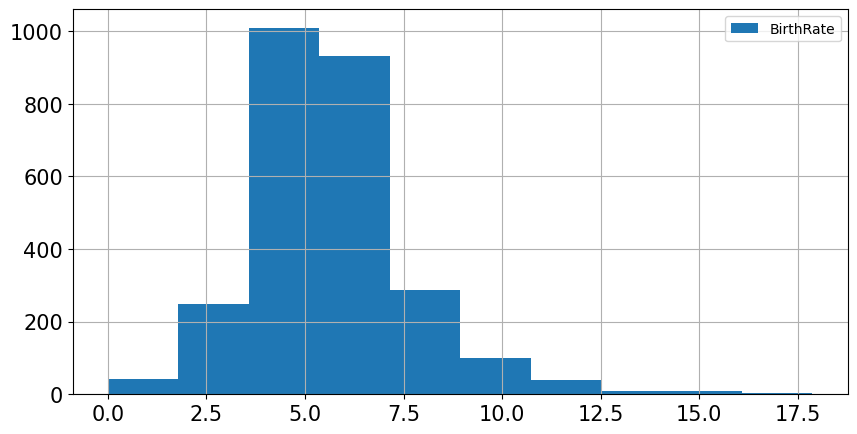

In [82]:
# Histogram after "shortening"
display_variable_hist('BirthRate')

# PART 4 : DECIDING WHICH VARIABLE TO KEEP 

In [83]:
# Dividing the dataset to numeric dataframe and categorical dataframe
cancer_df_num = cancer_df.drop(columns = ['binnedInc','Geography'])
cancer_df_num

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,63.7,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,58.4,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,61.6,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,1962.667684,48,146.4,453.549422,49508,29029,13.0,723.414516,32.2,31.0,...,80.0,52.9,24.3,9.5,94.291726,1.145104,1.386542,1.014038,43.276779,3.977583
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,78.3,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,64.5,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,62.0,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192


In [84]:
cancer_df_cat = cancer_df[['binnedInc','Geography']]
cancer_df_cat

,binnedInc,Geography
0,BIN_5,WEST
1,BIN_4,WEST
2,BIN_4,WEST
3,BIN_3,WEST
4,BIN_4,WEST
...,...,...
3041,BIN_4,CENTER
3042,BIN_3,CENTER
3043,BIN_4,CENTER
3044,BIN_4,CENTER


In [85]:
# Avoiding collinearity when selecting predictors
# When 2 or more independent variables in a model are highly correlated we say that we have a 
# multicollinearity problem

# Writing a function for creating a heatmap that displays correlations between variables
def display_corr(dataframe):
    sns.set(rc = {'figure.figsize':(35,15)})
    sns.heatmap(data = dataframe.corr(),
          annot = True,
         fmt = '.2g',
         center = 0,
          cmap = 'coolwarm',
          linewidths = 1, linecolor = 'black')

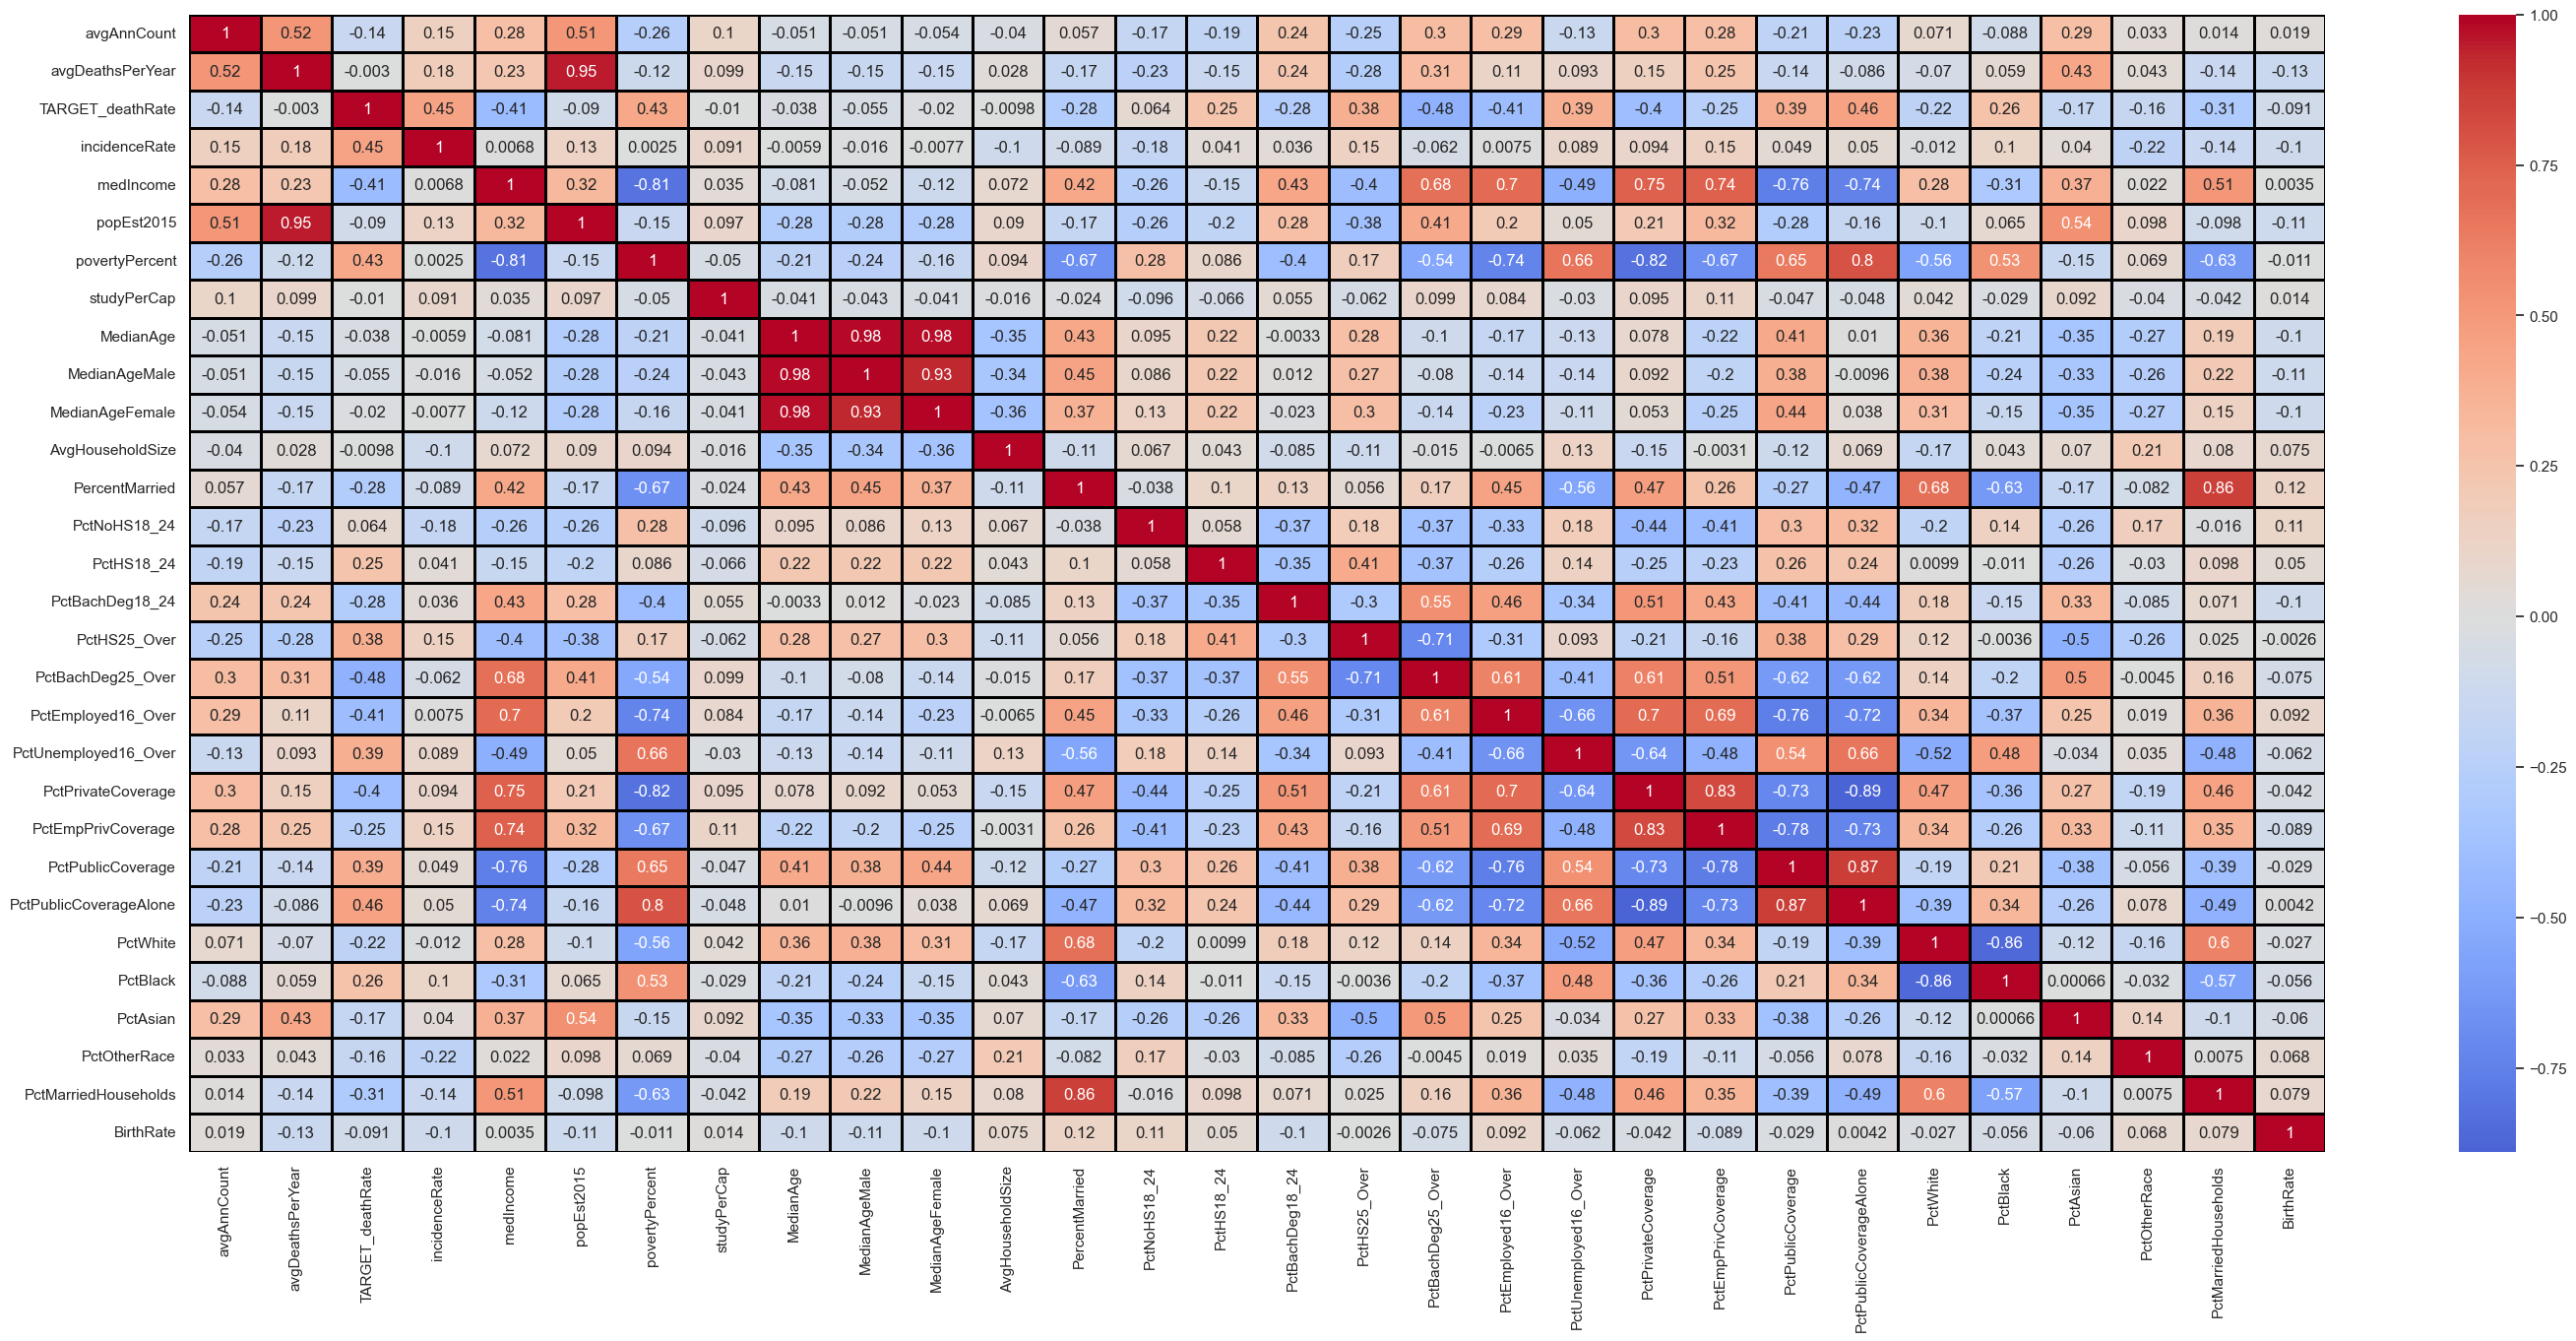

In [86]:
# Creating a heatmap to detect if there is any high correlation between the independent variables
display_corr(cancer_df_num)

In [87]:
# There are some of the variables that are strongly correlated (negatively or positively).
# Maybe it is best to check for Multicollinearity with the help of Variance Inflation Factor

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant  

# Piece of code that calculates VIF
X = add_constant(cancer_df_num)  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)  

const                     2149.640323
avgAnnCount                  1.602259
avgDeathsPerYear            15.366754
TARGET_deathRate             2.073848
incidenceRate                1.570242
medIncome                    7.511472
popEst2015                  17.364547
povertyPercent               9.250199
studyPerCap                  1.050751
MedianAge                  246.317526
MedianAgeMale               84.138260
MedianAgeFemale             62.738286
AvgHouseholdSize             1.332486
PercentMarried              11.578337
PctNoHS18_24                 1.705861
PctHS18_24                   1.611764
PctBachDeg18_24              1.788673
PctHS25_Over                 3.434895
PctBachDeg25_Over            5.319432
PctEmployed16_Over           6.975205
PctUnemployed16_Over         2.786801
PctPrivateCoverage          15.880686
PctEmpPrivCoverage           7.682179
PctPublicCoverage           24.575817
PctPublicCoverageAlone      23.510522
PctWhite                     6.843162
PctBlack    

In [89]:
# All the variables where VIF > 2 , will be dropped
# If VIF < 1 : Low correlation
# If  1< VIF < 5 : Medium correlation
# If VIF > 5 : High correlation

In [90]:
# We are going to create a loop that runs while the max VIF is greater than 2.
# In the loop, the VIF of every variable will be calculated, than if the max VIF is greater than 2, this 
# variable will be erased from the numeric dataset.

In [91]:
ds.drop(labels = 'const',axis = 0, inplace = True)
ds
# Erasing the previously created constant

avgAnnCount                 1.602259
avgDeathsPerYear           15.366754
TARGET_deathRate            2.073848
incidenceRate               1.570242
medIncome                   7.511472
popEst2015                 17.364547
povertyPercent              9.250199
studyPerCap                 1.050751
MedianAge                 246.317526
MedianAgeMale              84.138260
MedianAgeFemale            62.738286
AvgHouseholdSize            1.332486
PercentMarried             11.578337
PctNoHS18_24                1.705861
PctHS18_24                  1.611764
PctBachDeg18_24             1.788673
PctHS25_Over                3.434895
PctBachDeg25_Over           5.319432
PctEmployed16_Over          6.975205
PctUnemployed16_Over        2.786801
PctPrivateCoverage         15.880686
PctEmpPrivCoverage          7.682179
PctPublicCoverage          24.575817
PctPublicCoverageAlone     23.510522
PctWhite                    6.843162
PctBlack                    5.476200
PctAsian                    1.996165
P

In [92]:
dependent_variable = cancer_df_num.TARGET_deathRate # Storing the dependent variable so it will not be 
# erased by the loop

In [93]:
# Running the loop
while ds.max() > 1.5:
    X = add_constant(cancer_df_num)  
    ds = pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)
    ds.drop(labels = 'const', axis = 0, inplace = True)
    column_to_be_removed = ds.idxmax()
    del cancer_df_num[column_to_be_removed]
    ds.drop(labels = ds.idxmax(),axis = 0, inplace = True)

print(ds)

avgAnnCount             1.174066
incidenceRate           1.148674
studyPerCap             1.028721
AvgHouseholdSize        1.192344
PctNoHS18_24            1.237702
PctHS18_24              1.181136
PctUnemployed16_Over    1.398467
PctBlack                1.411620
PctAsian                1.346157
PctOtherRace            1.216459
BirthRate               1.066027
dtype: float64


In [94]:
cancer_df_num['TARGET_deathRate'] = dependent_variable 
# Adding the dependent variable to the numeric dataset

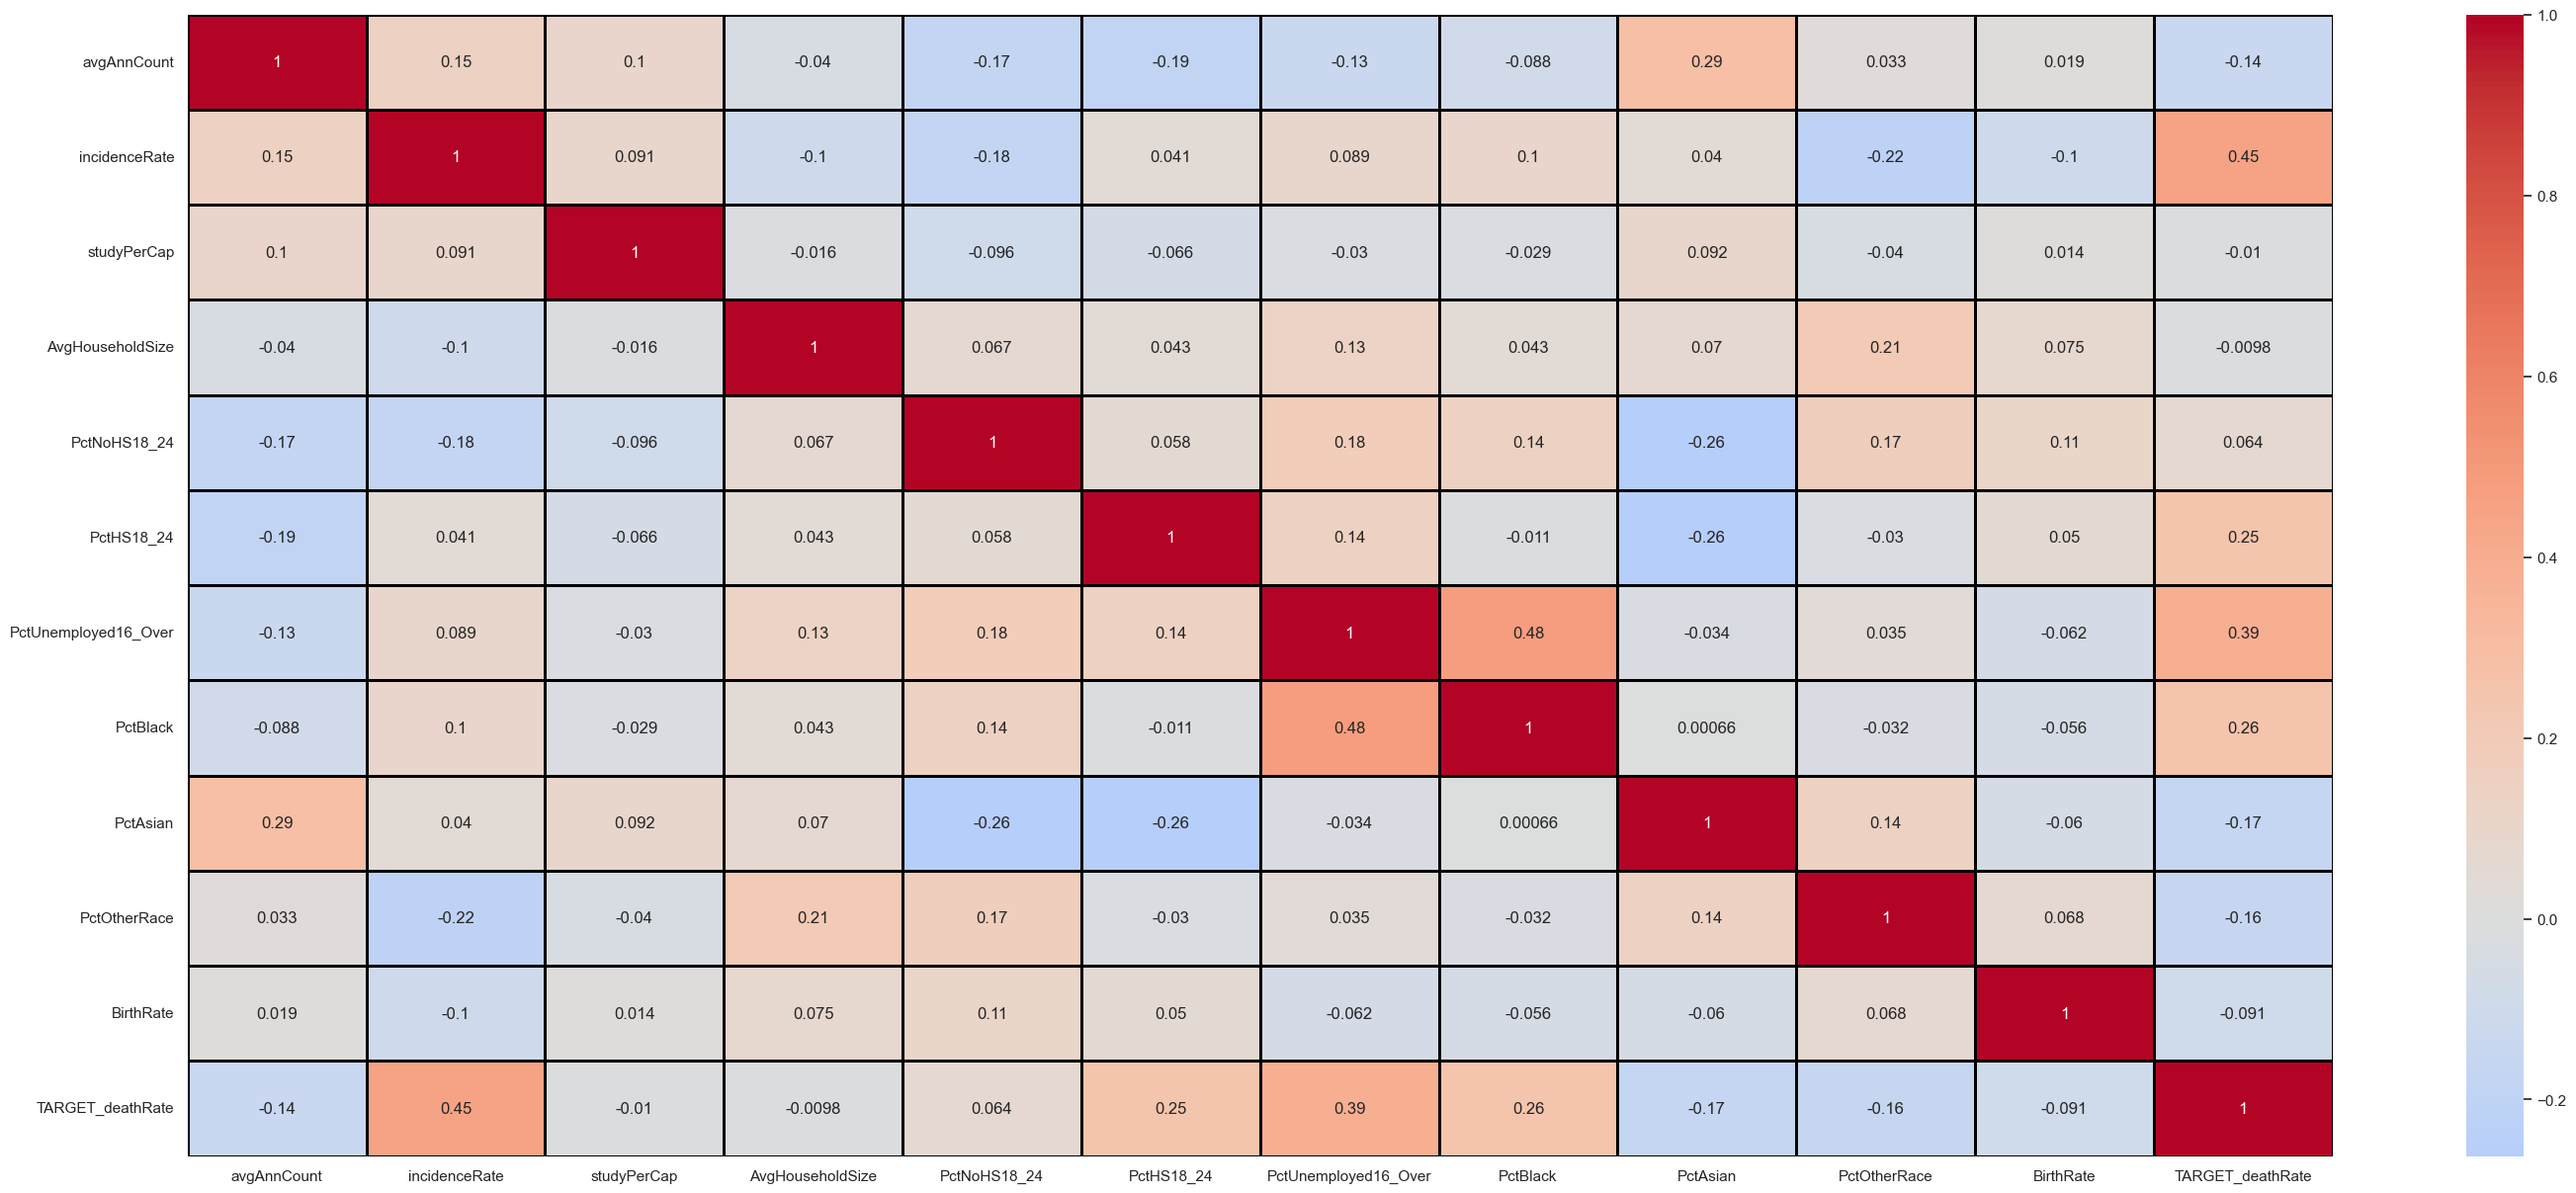

In [95]:
display_corr(cancer_df_num)

In [96]:
# Most of the high correlated variables are gone

In [97]:
# Checking VIF again
X = add_constant(cancer_df_num)  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds) 

const                   160.912554
avgAnnCount               1.186595
incidenceRate             1.438276
studyPerCap               1.028391
AvgHouseholdSize          1.079276
PctNoHS18_24              1.219514
PctHS18_24                1.167551
PctUnemployed16_Over      1.514952
PctBlack                  1.337453
PctAsian                  1.279013
PctOtherRace              1.161048
BirthRate                 1.042086
TARGET_deathRate          1.650368
dtype: float64


In [98]:
cancer_df = pd.concat([cancer_df_num.round(3),cancer_df_cat], axis =  1)
cancer_df.head(2) # Concatenating the numerical dataframe and the categorical one

,avgAnnCount,incidenceRate,studyPerCap,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctUnemployed16_Over,PctBlack,PctAsian,PctOtherRace,BirthRate,TARGET_deathRate,binnedInc,Geography
0,1397.0,489.8,499.748,2.54,11.5,39.5,8.0,2.595,4.822,1.843,6.119,164.9,BIN_5,WEST
1,173.0,411.6,23.111,2.34,6.1,22.4,7.8,0.969,2.246,3.741,4.333,161.3,BIN_4,WEST


In [99]:
# We are finally ready to start preparing the Multilinear Regression Model 

# Multilinear Regression 

In [100]:
# Getting Dummy variables, dropping one to avoid the dummy variable trap
cancer_df = pd.get_dummies(data = cancer_df, drop_first = True)
cancer_df.head(2)

,avgAnnCount,incidenceRate,studyPerCap,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctUnemployed16_Over,PctBlack,PctAsian,PctOtherRace,BirthRate,TARGET_deathRate,binnedInc_BIN_2,binnedInc_BIN_3,binnedInc_BIN_4,binnedInc_BIN_5,Geography_EAST,Geography_WEST
0,1397.0,489.8,499.748,2.54,11.5,39.5,8.0,2.595,4.822,1.843,6.119,164.9,0,0,0,1,0,1
1,173.0,411.6,23.111,2.34,6.1,22.4,7.8,0.969,2.246,3.741,4.333,161.3,0,0,1,0,0,1


In [101]:
# Isolating x and y
y = cancer_df['TARGET_deathRate']
x = cancer_df.drop(columns = ['TARGET_deathRate'])
x.head(1)

,avgAnnCount,incidenceRate,studyPerCap,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctUnemployed16_Over,PctBlack,PctAsian,PctOtherRace,BirthRate,binnedInc_BIN_2,binnedInc_BIN_3,binnedInc_BIN_4,binnedInc_BIN_5,Geography_EAST,Geography_WEST
0,1397.0,489.8,499.748,2.54,11.5,39.5,8.0,2.595,4.822,1.843,6.119,0,0,0,1,0,1


In [102]:
# Adding constant
x = sm.add_constant(x)
x.head(1)

,const,avgAnnCount,incidenceRate,studyPerCap,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctUnemployed16_Over,PctBlack,PctAsian,PctOtherRace,BirthRate,binnedInc_BIN_2,binnedInc_BIN_3,binnedInc_BIN_4,binnedInc_BIN_5,Geography_EAST,Geography_WEST
0,1.0,1397.0,489.8,499.748,2.54,11.5,39.5,8.0,2.595,4.822,1.843,6.119,0,0,0,1,0,1


In [103]:
# Training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 666 )
x_train.head(2)

,const,avgAnnCount,incidenceRate,studyPerCap,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctUnemployed16_Over,PctBlack,PctAsian,PctOtherRace,BirthRate,binnedInc_BIN_2,binnedInc_BIN_3,binnedInc_BIN_4,binnedInc_BIN_5,Geography_EAST,Geography_WEST
891,1.0,782.0,457.0,73.537,2.50,18.0,33.7,8.5,10.273,1.669,0.653,5.939,0,0,0,1,1,0
1393,1.0,58.0,405.4,0.000,2.44,15.6,13.1,9.7,0.662,0.441,1.537,6.036,1,0,0,0,0,1


In [104]:
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     115.7
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          7.04e-287
Time:                        22:06:45   Log-Likelihood:                -9462.3
No. Observations:                2144   AIC:                         1.896e+04
Df Residuals:                    2126   BIC:                         1.906e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   67.5602 

In [105]:
# Adj. R-squared: 0.476
    # The model is a little bit underfitting

    # Some variables are not statistically significant (P>|t| >> 0)  

    # One of the Notes is :
        # The condition number is large, 9.94e+03. This might indicate that there are strong 
        # multicollinearity or other numerical problems.
    
        # This is a scaling issue, not a multicollinearity problem.

# Assessing Model Accuracy

In [106]:
predictions = model.predict(x_test)
predictions

2692    190.170072
1842    167.676125
2397    179.528444
246     165.820486
261     195.801794
           ...    
2611    188.576067
2905    176.869089
2993    168.313157
2885    203.908136
631     162.783660
Length: 536, dtype: float64

In [107]:
# Accuracy Assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", round(mean_absolute_error(y_test, predictions),1))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predictions)),1))
MAPE = mean_absolute_error(y_test, predictions)/np.average(y_test)
print('MAPE:', round(MAPE * 100,2),'%')

MAE: 15.4
RMSE: 20.5
MAPE: 8.59 %
